Starting AND gate perceptron training...

Training Progress:
------------------------------------------------------------

Epoch 1:
Weights: [0.06075449 0.01705241]
Bias: -0.09349484070147206
Actual vs Predicted:
Input: [1 1], Actual: 1, Predicted: 0
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 0, Predicted: 0
Input: [1 0], Actual: 0, Predicted: 0
------------------------------------------------------------

Epoch 2:
Weights: [0.16075449 0.01705241]
Bias: -0.19349484070147205
Actual vs Predicted:
Input: [1 1], Actual: 1, Predicted: 0
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 0, Predicted: 0
Input: [1 0], Actual: 0, Predicted: 0
------------------------------------------------------------

Epoch 3:
Weights: [0.16075449 0.01705241]
Bias: -0.293494840701472
Actual vs Predicted:
Input: [1 1], Actual: 1, Predicted: 0
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 0, Predicted: 0
Input: [1 0], Actual: 0, Predicted: 0
-----------------------------

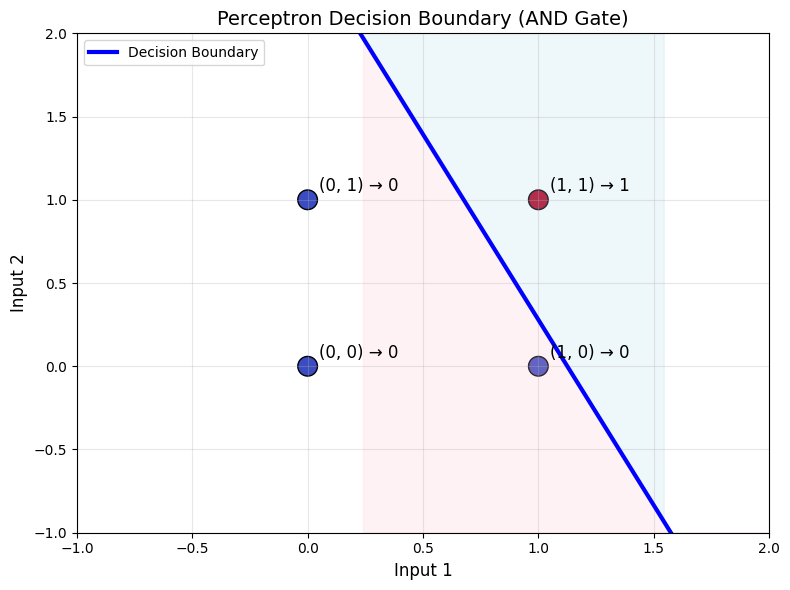

In [27]:
import numpy as np
import matplotlib.pyplot as plt

class CustomPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights with small random values instead of zeros
        self.weights = np.random.rand(n_features) * 0.1
        self.bias = np.random.rand() * 0.1

        print("Training Progress:")
        print("-" * 60)
        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

            # Print weights, bias, and predictions for each epoch
            predictions = self.predict(X)
            print(f"\nEpoch {epoch + 1}:")
            print(f"Weights: {self.weights}")
            print(f"Bias: {self.bias}")
            print("Actual vs Predicted:")
            for i in range(len(X)):
                print(f"Input: {X[i]}, Actual: {y[i]}, Predicted: {predictions[i]}")
            print("-" * 60)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

# Data (AND gate)
X = np.array([[1, 1], [0, 0], [0, 1], [1, 0]])
y = np.array([1, 0, 0, 0])

# Train custom perceptron
print("Starting AND gate perceptron training...\n")
perceptron = CustomPerceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

print("\nFinal Results:")
print("=" * 60)
print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias}")
print(f"Final predictions: {perceptron.predict(X)}")
print("=" * 60)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='coolwarm', edgecolors='k')

# Decision boundary line with extended range
x_min, x_max = -1.0, 2.0  # Extended range
y_min, y_max = -1.0, 2.0
if perceptron.weights[1] != 0:
    xx = np.linspace(x_min, x_max, 100)
    yy = (-perceptron.weights[0] / perceptron.weights[1]) * xx - (perceptron.bias / perceptron.weights[1])
    plt.plot(xx, yy, 'b-', linewidth=3, label='Decision Boundary')  # Changed to blue and thicker
else:
    plt.axvline(x=-perceptron.bias/perceptron.weights[0], color='b', linewidth=3)

# Highlight the correct decision boundary area
plt.fill_between(xx, yy, y_max, where=(yy >= y_min), color='lightblue', alpha=0.2)
plt.fill_between(xx, y_min, yy, where=(yy <= y_max), color='pink', alpha=0.2)

# Add annotations for each point
for i in range(len(X)):
    plt.text(X[i, 0] + 0.05, X[i, 1] + 0.05, f'({X[i, 0]}, {X[i, 1]}) → {y[i]}', fontsize=12)

plt.xlabel("Input 1", fontsize=12)
plt.ylabel("Input 2", fontsize=12)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Perceptron Decision Boundary (AND Gate)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()